# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

# cities

583

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = 'https://api.openweathermap.org/data/2.5/weather?q='
farenheit = 'units='

query_url = f'{base_url}{city}&units=imperial&appid={weather_api_key}'

response = requests.get(query_url).json()
response

{'coord': {'lon': 17.9442, 'lat': -33.0117},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 78.8,
  'feels_like': 68.04,
  'temp_min': 78.8,
  'temp_max': 78.8,
  'pressure': 1011,
  'humidity': 57},
 'visibility': 10000,
 'wind': {'speed': 26.46, 'deg': 200},
 'clouds': {'all': 0},
 'dt': 1612794923,
 'sys': {'type': 1,
  'id': 1943,
  'country': 'ZA',
  'sunrise': 1612757901,
  'sunset': 1612806393},
 'timezone': 7200,
 'id': 3361934,
 'name': 'Saldanha',
 'cod': 200}

In [4]:
name = []
country = []
lat = []
lng = []
temp_max = []
humid = []
clouds = []
wind = []
date = []

for city in cities:
    
    query_url = f'{base_url}{city}&units=imperial&appid={weather_api_key}'
    response = requests.get(query_url).json()
    
    try:
        name.append(response['name'])
        country.append(response['sys']['country'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        date.append(response['dt'])
        
        print(f"Retrieving Results for {city}. Appending stats.")
        
    except:
        print(f'{city} not found.')
        pass
        

Retrieving Results for ixtapa. Appending stats.
Retrieving Results for bokovskaya. Appending stats.
Retrieving Results for severo-kurilsk. Appending stats.
Retrieving Results for codrington. Appending stats.
Retrieving Results for thompson. Appending stats.
Retrieving Results for zhezkazgan. Appending stats.
Retrieving Results for bredasdorp. Appending stats.
Retrieving Results for rio gallegos. Appending stats.
Retrieving Results for cape town. Appending stats.
Retrieving Results for suntar. Appending stats.
Retrieving Results for bluff. Appending stats.
Retrieving Results for plettenberg bay. Appending stats.
Retrieving Results for kapaa. Appending stats.
satitoa not found.
Retrieving Results for luderitz. Appending stats.
Retrieving Results for albany. Appending stats.
eldikan not found.
Retrieving Results for ikalamavony. Appending stats.
Retrieving Results for tessalit. Appending stats.
Retrieving Results for bambous virieux. Appending stats.
Retrieving Results for busselton. Appe

Retrieving Results for tambopata. Appending stats.
Retrieving Results for qaanaaq. Appending stats.
Retrieving Results for athmallik. Appending stats.
Retrieving Results for touros. Appending stats.
Retrieving Results for itupiranga. Appending stats.
Retrieving Results for nibbar. Appending stats.
Retrieving Results for galle. Appending stats.
Retrieving Results for fortuna. Appending stats.
Retrieving Results for sao sebastiao. Appending stats.
tumannyy not found.
Retrieving Results for taoudenni. Appending stats.
Retrieving Results for bentiu. Appending stats.
Retrieving Results for owase. Appending stats.
Retrieving Results for chuy. Appending stats.
Retrieving Results for punta arenas. Appending stats.
Retrieving Results for yeniseysk. Appending stats.
Retrieving Results for ukiah. Appending stats.
Retrieving Results for chicama. Appending stats.
Retrieving Results for vostok. Appending stats.
Retrieving Results for sindal. Appending stats.
Retrieving Results for saint-joseph. Appe

Retrieving Results for nalut. Appending stats.
Retrieving Results for narsaq. Appending stats.
tunduru not found.
Retrieving Results for sooke. Appending stats.
Retrieving Results for kananga. Appending stats.
barbar not found.
Retrieving Results for imeni poliny osipenko. Appending stats.
Retrieving Results for uyuni. Appending stats.
Retrieving Results for longyearbyen. Appending stats.
Retrieving Results for balkanabat. Appending stats.
Retrieving Results for krasnoselkup. Appending stats.
Retrieving Results for goundam. Appending stats.
Retrieving Results for pevek. Appending stats.
falealupo not found.
Retrieving Results for qasigiannguit. Appending stats.
Retrieving Results for sao gabriel da cachoeira. Appending stats.
barawe not found.
Retrieving Results for wuda. Appending stats.
Retrieving Results for sao filipe. Appending stats.
Retrieving Results for talcahuano. Appending stats.
Retrieving Results for boysun. Appending stats.
Retrieving Results for olden. Appending stats.
R

Retrieving Results for praia da vitoria. Appending stats.
Retrieving Results for krasnyy chikoy. Appending stats.
Retrieving Results for senanga. Appending stats.
Retrieving Results for baracoa. Appending stats.
Retrieving Results for srikakulam. Appending stats.
babanusah not found.
Retrieving Results for qaqortoq. Appending stats.
Retrieving Results for las tunas. Appending stats.
Retrieving Results for palmer. Appending stats.
Retrieving Results for coahuayana. Appending stats.
Retrieving Results for kendari. Appending stats.
Retrieving Results for kungurtug. Appending stats.
Retrieving Results for santa cruz de tenerife. Appending stats.
saryshagan not found.
Retrieving Results for sinazongwe. Appending stats.
himora not found.
Retrieving Results for kailua. Appending stats.
Retrieving Results for balabac. Appending stats.
Retrieving Results for comodoro rivadavia. Appending stats.
Retrieving Results for portland. Appending stats.
Retrieving Results for yichang. Appending stats.
Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [143]:
# Create DataFrame
weather_df = pd.DataFrame({
    'City': name,
    'Country': country,
    'Lat': lat,
    'Lng': lng,
    'Max Temp': temp_max,
    'Humidity': humid,
    'Cloudiness': clouds,
    'Wind Speed': wind,
    'Date': date,
})
    
weather_df

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Ixtapa,MX,20.7000,-105.2000,59.00,94,40,3.44,1612795091
1,Bokovskaya,RU,49.2290,41.8306,18.97,82,100,7.61,1612795091
2,Severo-Kuril'sk,RU,50.6789,156.1250,18.68,93,87,6.20,1612795091
3,Codrington,AU,-38.2667,141.9667,54.36,87,23,9.66,1612795091
4,Thompson,CA,55.7435,-97.8558,-25.60,68,90,14.97,1612795091
...,...,...,...,...,...,...,...,...,...
530,Ibrā’,OM,22.6906,58.5334,70.30,41,100,8.23,1612795091
531,Beisfjord,NO,68.3751,17.5988,30.20,86,40,3.44,1612795091
532,Severodvinsk,RU,64.5635,39.8302,-13.00,77,20,2.24,1612795091
533,Turukhansk,RU,65.8167,87.9833,4.82,94,100,7.94,1612795091


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [144]:
#  Get the indices of cities that have humidity over 100%.
# weather_df.dtypes

# just in case
weather_df = weather_df.loc[weather_df['Humidity'] < 100]

weather_df.to_csv('output_data/weather_data.csv')

weathercsv_df = pd.read_csv('output_data/weather_data.csv', low_memory=False)

# weather_df['Date'] = pd.to_datetime(weather_df['Date'],unit='s').dt.date
weather_df

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Ixtapa,MX,20.7000,-105.2000,59.00,94,40,3.44,1612795091
1,Bokovskaya,RU,49.2290,41.8306,18.97,82,100,7.61,1612795091
2,Severo-Kuril'sk,RU,50.6789,156.1250,18.68,93,87,6.20,1612795091
3,Codrington,AU,-38.2667,141.9667,54.36,87,23,9.66,1612795091
4,Thompson,CA,55.7435,-97.8558,-25.60,68,90,14.97,1612795091
...,...,...,...,...,...,...,...,...,...
530,Ibrā’,OM,22.6906,58.5334,70.30,41,100,8.23,1612795091
531,Beisfjord,NO,68.3751,17.5988,30.20,86,40,3.44,1612795091
532,Severodvinsk,RU,64.5635,39.8302,-13.00,77,20,2.24,1612795091
533,Turukhansk,RU,65.8167,87.9833,4.82,94,100,7.94,1612795091


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

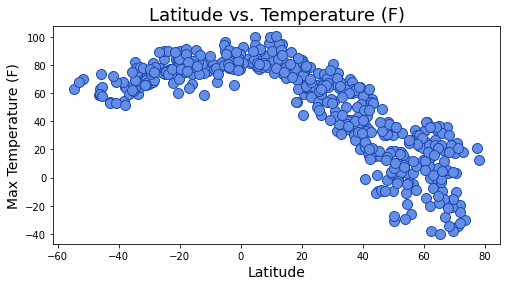

In [119]:
lat_x = weather_df['Lat']
temp_y = weather_df['Max Temp']

plt.figure(figsize=(8, 4))
plt.scatter(lat_x, temp_y, marker='o', facecolors="#648DE5", edgecolors="#1e4bae", s=100)
plt.title('Latitude vs. Temperature (F)', fontsize=18)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Max Temperature (F)', fontsize=14)
plt.show()

### Observations
This plot has a relative arc to it in that from the left southern hemisphere, the dots trend warmer in temperature as they get closer to 0 (the equator). As the latitude increases above zero (northern hemisphere), the temperatures decrease. Temperatures in the northern hemisphere are lower than the souther hemisphere because it is currently winter in the northern hemisphere.

## Latitude vs. Humidity Plot

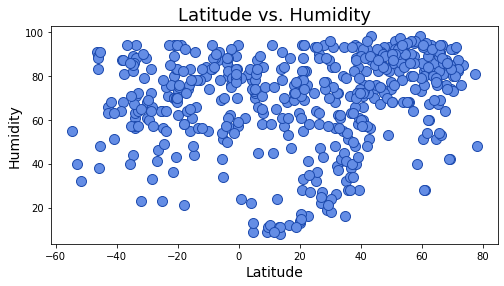

In [120]:
lat_x = weather_df['Lat']
humid_y = weather_df['Humidity']

plt.figure(figsize=(8, 4))
plt.scatter(lat_x, humid_y, marker='o', facecolors="#648DE5", edgecolors="#1e4bae", s=100)
plt.title('Latitude vs. Humidity', fontsize=18)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Humidity', fontsize=14)
plt.show()

### Obervations
This plot does not take on any shape that would indicate a pattern other than--at a glance--it seems to be slightly more humid in the northern hemisphere. That is, the dots are more condensed in the upper-right of the plot.

## Latitude vs. Cloudiness Plot

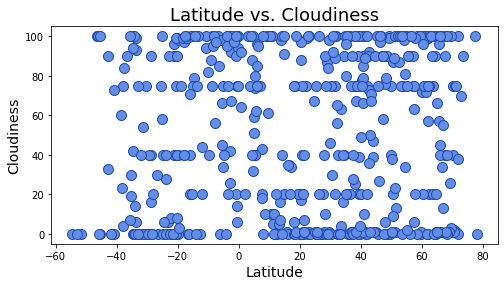

In [121]:
lat_x = weather_df['Lat']
cloud_y = weather_df['Cloudiness']

plt.figure(figsize=(8, 4))
plt.scatter(lat_x, cloud_y, marker='o', facecolors="#648DE5", edgecolors="#1e4bae", s=100)
plt.title('Latitude vs. Cloudiness', fontsize=18)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Cloudiness', fontsize=14)
plt.show()

### Observations
Cloudiness does not appear to be strongly affected by latitude.

## Latitude vs. Wind Speed Plot

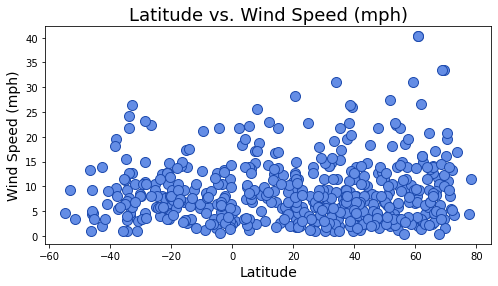

In [122]:
lat_x = weather_df['Lat']
wind_y = weather_df['Wind Speed']

plt.figure(figsize=(8, 4))
plt.scatter(lat_x, wind_y, marker='o', facecolors="#648DE5", edgecolors="#1e4bae", s=100)
plt.title('Latitude vs. Wind Speed (mph)', fontsize=18)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Wind Speed (mph)', fontsize=14)
plt.show()

## Linear Regression

In [123]:
northern_df = weather_df.loc[weather_df['Lat'] > 0]
# northern_df

southern_df = weather_df.loc[weather_df['Lat'] < 0]
# southern_df

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

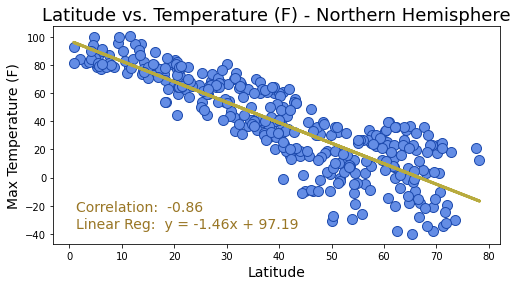

In [124]:
n_lat_x = northern_df['Lat']
n_temp_y = northern_df['Max Temp']

n_temp_slope, n_temp_int, n_temp_r, n_temp_p, n_temp_std_err = linregress(n_lat_x, n_temp_y)
n_temp_regression = n_temp_slope * n_lat_x + n_temp_int
n_temp_regression_txt = f'y = {str(round(n_temp_slope,2))}x + {str(round(n_temp_int,2))}'

plt.figure(figsize=(8, 4))
plt.scatter(n_lat_x, n_temp_y, marker='o', facecolors="#648DE5", edgecolors="#1e4bae", s=100)
plt.plot(n_lat_x, n_temp_regression, color='#B8AB3E', linewidth=3)
plt.title('Latitude vs. Temperature (F) - Northern Hemisphere', fontsize=18)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Max Temperature (F)', fontsize=14)
plt.annotate(f'Correlation:  {round(n_temp_r, 2)}', xy=(0.05, 0.15), xycoords='axes fraction', \
             fontsize=14, color='#997625')
plt.annotate(f'Linear Reg:  {n_temp_regression_txt}', xy=(0.05, 0.07), xycoords='axes fraction', \
             fontsize=14, color='#997625')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

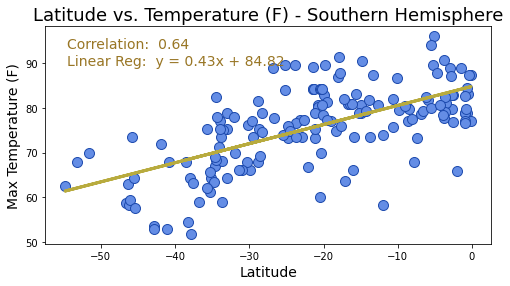

In [125]:
s_lat_x = southern_df['Lat']
s_temp_y = southern_df['Max Temp']

s_temp_slope, s_temp_int, s_temp_r, s_temp_p, s_temp_std_err = linregress(s_lat_x, s_temp_y)
s_temp_regression = s_temp_slope * s_lat_x + s_temp_int
s_temp_regression_txt = f'y = {str(round(s_temp_slope,2))}x + {str(round(s_temp_int,2))}'

plt.figure(figsize=(8, 4))
plt.scatter(s_lat_x, s_temp_y, marker='o', facecolors="#648DE5", edgecolors="#1e4bae", s=100)
plt.plot(s_lat_x, s_temp_regression, color='#B8AB3E', linewidth=3)
plt.title('Latitude vs. Temperature (F) - Southern Hemisphere', fontsize=18)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Max Temperature (F)', fontsize=14)
plt.annotate(f'Correlation:  {round(s_temp_r, 2)}', xy=(0.05, 0.9), xycoords='axes fraction', \
             fontsize=14, color='#997625')
plt.annotate(f'Linear Reg:  {s_temp_regression_txt}', xy=(0.05, 0.82), xycoords='axes fraction', \
             fontsize=14, color='#997625')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

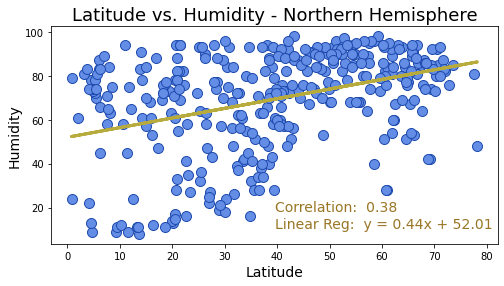

In [126]:
n_lat_x = northern_df['Lat']
n_humid_y = northern_df['Humidity']

n_humid_slope, n_humid_int, n_humid_r, n_humid_p, n_humid_std_err = linregress(n_lat_x, n_humid_y)
n_humid_regression = n_humid_slope * n_lat_x + n_humid_int
n_humid_regression_txt = f'y = {str(round(n_humid_slope,2))}x + {str(round(n_humid_int,2))}'

plt.figure(figsize=(8, 4))
plt.scatter(n_lat_x, n_humid_y, marker='o', facecolors="#648DE5", edgecolors="#1e4bae", s=100)
plt.plot(n_lat_x, n_humid_regression, color='#B8AB3E', linewidth=3)
plt.title('Latitude vs. Humidity - Northern Hemisphere', fontsize=18)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Humidity', fontsize=14)
plt.annotate(f'Correlation:  {round(n_humid_r, 2)}', xy=(0.50, 0.15), xycoords='axes fraction', \
             fontsize=14, color='#997625')
plt.annotate(f'Linear Reg:  {n_humid_regression_txt}', xy=(0.50, 0.07), xycoords='axes fraction', \
             fontsize=14, color='#997625')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

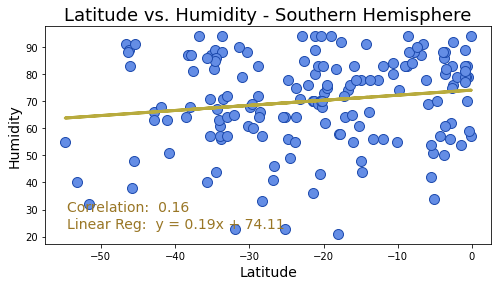

In [127]:
s_lat_x = southern_df['Lat']
s_humid_y = southern_df['Humidity']

s_humid_slope, s_humid_int, s_humid_r, s_humid_p, s_humid_std_err = linregress(s_lat_x, s_humid_y)
s_humid_regression = s_humid_slope * s_lat_x + s_humid_int
s_humid_regression_txt = f'y = {str(round(s_humid_slope,2))}x + {str(round(s_humid_int,2))}'

plt.figure(figsize=(8, 4))
plt.scatter(s_lat_x, s_humid_y, marker='o', facecolors="#648DE5", edgecolors="#1e4bae", s=100)
plt.plot(s_lat_x, s_humid_regression, color='#B8AB3E', linewidth=3)
plt.title('Latitude vs. Humidity - Southern Hemisphere', fontsize=18)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Humidity', fontsize=14)
plt.annotate(f'Correlation:  {round(s_humid_r, 2)}', xy=(0.05, 0.15), xycoords='axes fraction', \
             fontsize=14, color='#997625')
plt.annotate(f'Linear Reg:  {s_humid_regression_txt}', xy=(0.05, 0.07), xycoords='axes fraction', \
             fontsize=14, color='#997625')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

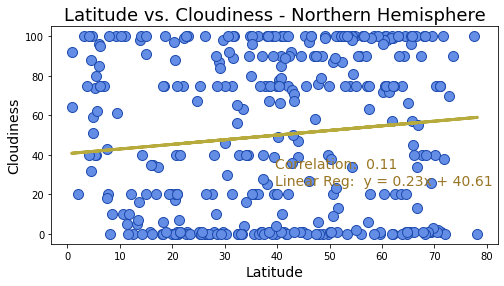

In [128]:
n_lat_x = northern_df['Lat']
n_cloud_y = northern_df['Cloudiness']

n_cloud_slope, n_cloud_int, n_cloud_r, n_cloud_p, n_cloud_std_err = linregress(n_lat_x, n_cloud_y)
n_cloud_regression = n_cloud_slope * n_lat_x + n_cloud_int
n_cloud_regression_txt = f'y = {str(round(n_cloud_slope,2))}x + {str(round(n_cloud_int,2))}'

plt.figure(figsize=(8, 4))
plt.scatter(n_lat_x, n_cloud_y, marker='o', facecolors="#648DE5", edgecolors="#1e4bae", s=100)
plt.plot(n_lat_x, n_cloud_regression, color='#B8AB3E', linewidth=3)
plt.title('Latitude vs. Cloudiness - Northern Hemisphere', fontsize=18)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Cloudiness', fontsize=14)
plt.annotate(f'Correlation:  {round(n_cloud_r, 2)}', xy=(0.50, 0.35), xycoords='axes fraction', \
             fontsize=14, color='#997625')
plt.annotate(f'Linear Reg:  {n_cloud_regression_txt}', xy=(0.50, 0.27), xycoords='axes fraction', \
             fontsize=14, color='#997625')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

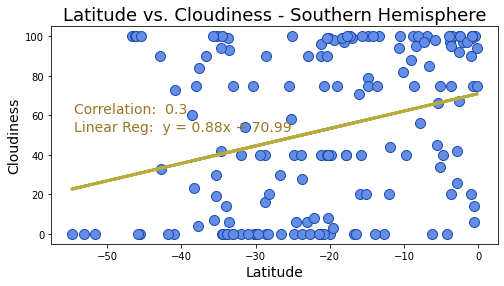

In [138]:
s_lat_x = southern_df['Lat']
s_cloud_y = southern_df['Cloudiness']

s_cloud_slope, s_cloud_int, s_cloud_r, s_cloud_p, s_cloud_std_err = linregress(s_lat_x, s_cloud_y)
s_cloud_regression = s_cloud_slope * s_lat_x + s_cloud_int
s_cloud_regression_txt = f'y = {str(round(s_cloud_slope,2))}x + {str(round(s_cloud_int,2))}'

plt.figure(figsize=(8, 4))
plt.scatter(s_lat_x, s_cloud_y, marker='o', facecolors="#648DE5", edgecolors="#1e4bae", s=100)
plt.plot(s_lat_x, s_cloud_regression, color='#B8AB3E', linewidth=3)
plt.title('Latitude vs. Cloudiness - Southern Hemisphere', fontsize=18)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Cloudiness', fontsize=14)
plt.annotate(f'Correlation:  {round(s_cloud_r, 2)}', xy=(0.05, 0.6), xycoords='axes fraction', \
             fontsize=14, color='#997625')
plt.annotate(f'Linear Reg:  {s_cloud_regression_txt}', xy=(0.05, 0.52), xycoords='axes fraction', \
             fontsize=14, color='#997625')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

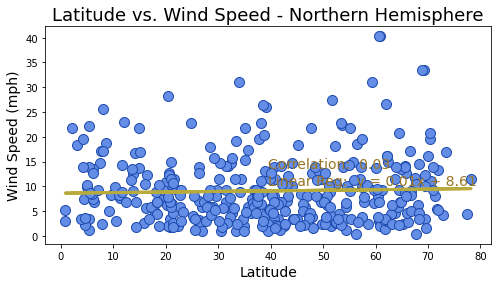

In [130]:
n_lat_x = northern_df['Lat']
n_wind_y = northern_df['Wind Speed']

n_wind_slope, n_wind_int, n_wind_r, n_wind_p, n_wind_std_err = linregress(n_lat_x, n_wind_y)
n_wind_regression = n_wind_slope * n_lat_x + n_wind_int
n_wind_regression_txt = f'y = {str(round(n_wind_slope,2))}x + {str(round(n_wind_int,2))}'

plt.figure(figsize=(8, 4))
plt.scatter(n_lat_x, n_wind_y, marker='o', facecolors="#648DE5", edgecolors="#1e4bae", s=100)
plt.plot(n_lat_x, n_wind_regression, color='#B8AB3E', linewidth=3)
plt.title('Latitude vs. Wind Speed - Northern Hemisphere', fontsize=18)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Wind Speed (mph)', fontsize=14)
plt.annotate(f'Correlation:  {round(n_wind_r, 2)}', xy=(0.50, 0.35), xycoords='axes fraction', \
             fontsize=14, color='#997625')
plt.annotate(f'Linear Reg:  {n_wind_regression_txt}', xy=(0.50, 0.27), xycoords='axes fraction', \
             fontsize=14, color='#997625')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

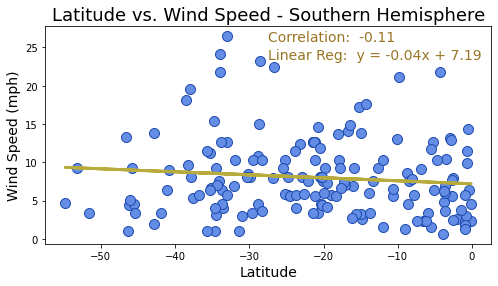

In [136]:
s_lat_x = southern_df['Lat']
s_wind_y = southern_df['Wind Speed']

s_wind_slope, s_wind_int, s_wind_r, s_wind_p, s_wind_std_err = linregress(s_lat_x, s_wind_y)
s_wind_regression = s_wind_slope * s_lat_x + s_wind_int
s_wind_regression_txt = f'y = {str(round(s_wind_slope,2))}x + {str(round(s_wind_int,2))}'

plt.figure(figsize=(8, 4))
plt.scatter(s_lat_x, s_wind_y, marker='o', facecolors="#648DE5", edgecolors="#1e4bae", s=100)
plt.plot(s_lat_x, s_wind_regression, color='#B8AB3E', linewidth=3)
plt.title('Latitude vs. Wind Speed - Southern Hemisphere', fontsize=18)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Wind Speed (mph)', fontsize=14)
plt.annotate(f'Correlation:  {round(s_wind_r, 2)}', xy=(0.5, 0.93), xycoords='axes fraction', \
             fontsize=14, color='#997625')
plt.annotate(f'Linear Reg:  {s_wind_regression_txt}', xy=(0.5, 0.85), xycoords='axes fraction', \
             fontsize=14, color='#997625')
plt.show()